In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
def nome_cols(df):
    df.rename(columns = {"nu_anoing_aln":"Periodo Vest",
                     "nu_matric_aln":"Matricula",
                     "nu_cpf_aln":"CPF",
                     "cd_sexo_sex":"Sexo",
                     "nm_nacional_pai":"Nacionalidade",
                     "Naturalidade":"Naturalidade Pai",
                     "cd_unifed_ufe":"Estado",
                     "cd_curso_cur":"Curso",
                     "cd_centro_cen":"Centro",
                     "dc_turno_tur":"Turno",
                     "nu_vestpontost_aln" :"Pontos Vest",
                     "nu_anoIngressoVest_aln":"Ano Vest",
                     "nu_anosg_aln":"Ano Form Colegio",
                     "nm_escolasg_aln":"Colegio EM",
                     "EnsinoMedio":"Cidade EM",
                     "cd_unifed_ufe.1":"Estado EM",
                     "Dt.Nascto":"Data Nasc",
                     "IdadeVestibular":"Idade Vest",
                     "dc_raca_rac":"Etnia",
                     "dc_ingresso_ing":"Forma de Ingresso",
                     "fl_professorEad_aln":"Ead",
                     "dc_categoriaEad_cae":"Categoria de Ingresso",
                     "nu_semestremax_cha":"SemestreMax",
                     "nu_sem_hst":"Semestre Historico",
                     "cd_disciplina_dis":"Disciplina",
                     "nu_nota_tpn":'Nota',
                     "nu_ha_hst":"Horas Aula",
                     "cd_frequencia_frq":"Frequencia",
                     "cd_tipodiscurriculo_tdc":"TipoCurriculo",
                     "cd_revalida_rev":"Revalida",
                     "cd_turma_hst":"Turma",
                     "nu_matric_pss":"Matricula Professor",
                     "nu_SIAPE_pss":"SIAPE Professor",
                     "nm_funcionario_pss":"Nome Professor",
                     "cd_situacao_sta":"Situacao Aluno num",
                     "dc_situacao_sta":"Situacao Aluno",
                     "cd_categoriaEad_cae":"Ead cae",
                     "fl_professorEad_aln.1":"Professor Ead",
                     "nm_curso_cur":"Nome Curso"},
          inplace=True)

In [4]:
df_ini_1 = pd.read_csv("Dados CTC (2ª leva) - 2000-2005.csv",low_memory=False)
df_ini_2 = pd.read_csv("Dados CTC (2ª leva) - 2006-2010.csv",low_memory=False)
df_ini_3 = pd.read_csv("Dados CTC (2ª leva) - 2011-2015.csv",low_memory=False)
df_ini_4 = pd.read_csv("Dados CTC (2ª leva) - 2016-2019.csv",low_memory=False)

#Juntar dfs
nome_cols(df_ini_1)
nome_cols(df_ini_2)
nome_cols(df_ini_3)
nome_cols(df_ini_4)

df = pd.concat([df_ini_1,df_ini_2,df_ini_3,df_ini_4])

KeyboardInterrupt: 

In [ ]:
#Linhas repetidas
df.drop_duplicates(subset=['Matricula','Semestre Historico','Disciplina'],inplace=True)
df = df[df['Semestre Historico'] %10 !=3]
df = df[df['Semestre Historico'] != 20191]
df = df[df['Semestre Historico'] != 20192]

df = df[df['Revalida'].isna()]

df = df[df['Horas Aula']!=0]
df = df[~df['Disciplina'].str.contains('ZZD')]
lis = ['TRA0000','GCN7999','GCN7999','EFC5570','EPS5247','INE5462','ECV5724','INE5463','CMA6413','ECV5706','INE5674',
       'INE5676','INE5462','ENS5504','EEL7700','EEL7703','EEL7800','ENS5503','ECV5723','EEL7701','EQA5803','EEL7702',
       'ARQ5708','EEL7704','INE5461','INE5678','ARQ5703','ARQ5704','ARQ5709','EQA5802','INE5671','INE5672','ECV5721',
       'ECV5722','ARQ5702','ARQ5706','EQA5801']
for i in lis:
    df = df[df['Disciplina'] != i]

df['Sexo'] = df['Sexo'].apply(lambda x: "M" if x == 'm' else x)
df['Sexo'] = df['Sexo'].apply(lambda x: "F" if x == 'f' else x)

df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "formado" if x == 'concluinte' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'desistência' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'jubilado' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'eliminado/cancelado' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'falecido' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'transferido' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "abandono" if x == 'troca de curso' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "regular" if x == 'classificado vestibular' else x)
df['Situacao Aluno'] = df['Situacao Aluno'].apply(lambda x: "regular" if x == 'trancado' else x)

df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Ob' if x == 'ob' else x )
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Ex' if x == 'EX' else x )
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Ex' if x == 'Es' else x )
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Op' if x == 'op' else x )
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x:'Ob' if x == ' ' else x )

df = df[df['TipoCurriculo'] != 'Ex']

x = df.groupby('Matricula')['Matricula'].count().to_frame()
x.rename(columns={'Matricula':'Materias'},inplace=True)
x = x[x['Materias'] <= 3]
lis = x.reset_index()['Matricula'].unique()

df = df[~df['Matricula'].isin(lis)]

# Feature Engineering

In [34]:
df['Forma de Ingresso'] = df['Forma de Ingresso'].apply(lambda x: "Vestibular" if x == ' Concurso vestibular' else x)
df['Forma de Ingresso'] = df['Forma de Ingresso'].apply(lambda x: "Vestibular" if x == ' Chamada vestibular' else x)
df['Forma de Ingresso'] = df['Forma de Ingresso'].apply(lambda x: "SISU" if x == ' Chamada SISU' else x)
df['Forma de Ingresso'] = df['Forma de Ingresso'].apply(lambda x: "SISU" if x == ' Vestibular SISU' else x)

x = df[df['Forma de Ingresso'] == 'SISU'].groupby('Matricula').agg({'Pontos Vest':'first'})[['Pontos Vest']].reset_index()
x.rename(columns={'Pontos Vest':'Pontos SISU'},inplace=True)
df = pd.merge(df,x,on='Matricula',how='left')

x = df[df['Forma de Ingresso'] != 'SISU'].groupby('Matricula').agg({'Pontos Vest':'first'})[['Pontos Vest']].reset_index()
x.rename(columns={'Pontos Vest':'Pontos Vestib'},inplace=True)
df = pd.merge(df,x,on='Matricula',how='left')

df['Pontos SISU'] = df['Pontos SISU'].fillna(0)
df['Pontos Vestib'] = df['Pontos Vestib'].fillna(0)
df['Pontos Vestib'] = df['Pontos Vestib'].apply(lambda x: x/100 if x > 30000 else x)

In [35]:
lis = ['Pontos Vestib','Pontos SISU','Idade Vest']
for i in lis:
    x = df[[i]].values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_normalized = pd.DataFrame(x_scaled)
    df[i] = df_normalized

In [36]:
x = df.groupby(['Matricula', 'Semestre Historico']).agg({'Horas Aula':'sum'}).reset_index().rename(columns={'Horas Aula':'Carga Horaria'})
df = pd.merge(df,x,on=['Matricula','Semestre Historico'],how='left')

#Repeticao de materia
df['Aprovado'] = df['Nota']
df['Aprovado'] = df['Aprovado'].apply(lambda x: 1 if x > 5.75 else 0)
df['vez'] = df.groupby(['Matricula', 'Disciplina'])['Semestre Historico'].cumcount()

#Agrupamento dentro de coluna
def Grupo(df,col,nome_grupo,lista):
    for i in lista:
        df[col] = df[col].apply(lambda x: nome_grupo if x == i else x)
        
#Regiao
Grupo(df,'Estado EM','SU',['SC','RS','PR'])
Grupo(df,'Estado EM','NE',['MA','PI','BA','PE','CE','RN','AL','SE','PB'])
Grupo(df,'Estado EM','SE',['SP','RJ','MG','ES'])
Grupo(df,'Estado EM','CO',['MT','MS','GO','DF'])
Grupo(df,'Estado EM','NO',['AM','AC','AP','PA','TO','RR','RO'])

#Etnia
#Grupo(df,'Etnia','priv',['branca','amarela'])
#df['Etnia'] = df['Etnia'].apply(lambda x: 1 if x != 'priv' else 0)

#Sexo
Grupo(df,'Sexo','M',['M','m'])
Grupo(df,'Sexo','F',['F','f'])
df['Sexo'] = df['Sexo'].apply(lambda x: 0 if x == 'M' else 1)

#Cotas
for i in ['Escola Pública', 'Negro',
       'Vagas Suplementares - Indígena',
       'PAA - Escola Pública - Renda até 1,5 Salário Mínimo - Outros',
       'PAA - Escola Pública - Renda acima de 1,5 Salários Mínimos - Outros',
       'PAA - Escola Pública - Renda acima de 1,5 Salários Mínimos - PPI (Pretos, Pardos e Indígenas)',
       'PAA - Escola Pública - Renda até 1,5 Salário Mínimo - PPI (Pretos, Pardos e Indígenas)',
       'Vagas Suplementares - Negro', 'Vagas Suplementares - Quilombola',
       'PAA - Escola Pública - Renda acima de 1,5 Salários Mínimos - PPI (Pretos, Pardos e Indígenas) sem deficiência',
       'PAA - Escola Pública - Renda até 1,5 Salário Mínimo - Outros sem deficiência',
       'PAA - Escola Pública - Renda até 1,5 Salário Mínimo - PPI (Pretos, Pardos e Indígenas) sem deficiência',
       'PAA - Escola Pública - Renda acima de 1,5 Salários Mínimos - PPI (Pretos, Pardos e Indígenas) com deficiência',
       'PAA - Escola Pública - Renda acima de 1,5 Salários Mínimos - Outros sem deficiência',
       'PAA - Escola Pública - Renda acima de 1,5 Salários Mínimos - Outros com deficiência',
       'PAA - Escola Pública - Renda até 1,5 Salário Mínimo - Outros com deficiência',
       'PAA - Escola Pública - Renda até 1,5 Salário Mínimo - PPI (Pretos, Pardos e Indígenas) com deficiência']:
    df['Categoria de Ingresso'] = df['Categoria de Ingresso'].apply(lambda x: 1 if x == i else x)
    
df['Categoria de Ingresso'] = df['Categoria de Ingresso'].apply(lambda x: 0 if x != 1 else x)

#Contagem de Disciplinas
m = df.groupby(['Matricula','Semestre Historico'])['Disciplina'].count().rename('Cont Disc')
df = df.set_index(['Matricula','Semestre Historico']).join(m).reset_index()

#Tipo Curriculo
df['TipoCurriculo'] = df['TipoCurriculo'].apply(lambda x: 1 if x == 'Ob' else 0)

#Column Drop
#df = df[df['Ead'].isnull()]                                         Descobrir oq é esse Ead
df.drop(['Ead','Ead cae','Revalida','Situacao Aluno','Forma de Ingresso','Curso','Turma','Centro','Nacionalidade',
         'Naturalidade Pai','Turno','Colegio EM','Data Nasc','Estado','Estado EM','Cidade EM','Ano Form Colegio',
         'SemestreMax','Professor Ead','SIAPE Professor','Nome Professor', 'Situacao Aluno num'],axis=1,inplace=True)

In [37]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
    
    t = df2.sort_values('Semestre Historico').groupby('Disciplina').agg({'Aprovado':'mean','Semestre Historico':'last'})

    t.reset_index(inplace=True)
    t.rename(columns={"Aprovado": "Aprov Disc"},inplace=True)
    t = t[t['Semestre Historico'] == lis[i]]
    t['Semestre Historico'] = lis[i+1]
    t.set_index(['Disciplina','Semestre Historico'],inplace=True)

    m1.set_index(['Disciplina','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,t])
    m1.reset_index(inplace=True)
    
m1.set_index(['Disciplina','Semestre Historico'],inplace=True)
df.set_index(['Disciplina','Semestre Historico'],inplace=True)
m1.drop(['Matricula', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Carga Horaria',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Pontos Vestib','Pontos SISU',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [38]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
    
    t = df2.sort_values('Semestre Historico').groupby('Matricula').agg({'Aprovado':'mean','Semestre Historico':'last'})
    
    t.reset_index(inplace=True)
    t.rename(columns={"Aprovado": "Aprov Aluno"},inplace=True)
    t = t[t['Semestre Historico'] == lis[i]]
    t['Semestre Historico'] = lis[i+1]
    t.set_index(['Matricula','Semestre Historico'],inplace=True)

    m1.set_index(['Matricula','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,t])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula','Semestre Historico'],inplace=True)
df.set_index(['Matricula','Semestre Historico'],inplace=True)
m1.drop(['Disciplina', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Carga Horaria',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Pontos Vestib','Pontos SISU',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [39]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
    
    t = df2.sort_values('Semestre Historico').groupby(['Matricula Professor','Disciplina']).agg({'Aprovado':'mean','Semestre Historico':'last'})
    
    t.reset_index(inplace=True)
    t.rename(columns={"Aprovado": "Aprov Prof"},inplace=True)
    t = t[t['Semestre Historico'] == lis[i]]
    t['Semestre Historico'] = lis[i+1]   
    t.set_index(['Matricula Professor','Disciplina','Semestre Historico'],inplace=True)
    


    m1.set_index(['Matricula Professor','Disciplina','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,t])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula Professor','Disciplina','Semestre Historico'],inplace=True)
df.set_index(['Matricula Professor','Disciplina','Semestre Historico'],inplace=True)
m1.drop(['Matricula', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Carga Horaria',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Pontos Vestib','Pontos SISU',
       'TipoCurriculo', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc','Aprov Aluno'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [40]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
    df2 = df2[df2['Semestre Historico'] >= lis[i-2]]
                     
        
    t = df2.sort_values('Semestre Historico').groupby('Matricula').agg({'Aprovado':'mean','Semestre Historico':'last'})
    
    t.reset_index(inplace=True)
    t.rename(columns={"Aprovado": "Aprov -3"},inplace=True)
    t = t[t['Semestre Historico'] == lis[i]]
    t['Semestre Historico'] = lis[i+1]
    t.set_index(['Matricula','Semestre Historico'],inplace=True)

    m1.set_index(['Matricula','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,t])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula','Semestre Historico'],inplace=True)
df.set_index(['Matricula','Semestre Historico'],inplace=True)
m1.drop(['Disciplina', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Carga Horaria',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Pontos Vestib','Pontos SISU',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc','Aprov Aluno','Aprov Prof'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [41]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
    df2 = df2[df2['Semestre Historico'] >= lis[i]]
                     
        
    t = df2.sort_values('Semestre Historico').groupby('Matricula').agg({'Aprovado':'mean','Semestre Historico':'last'})
    
    t.reset_index(inplace=True)
    t.rename(columns={"Aprovado": "Aprov -1"},inplace=True)
    t = t[t['Semestre Historico'] == lis[i]]
    t['Semestre Historico'] = lis[i+1]
    t.set_index(['Matricula','Semestre Historico'],inplace=True)

    m1.set_index(['Matricula','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,t])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula','Semestre Historico'],inplace=True)
df.set_index(['Matricula','Semestre Historico'],inplace=True)
m1.drop(['Disciplina', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Carga Horaria',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Pontos Vestib','Pontos SISU',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc','Aprov Aluno','Aprov Prof','Aprov -3'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [42]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
    df2 = df2[df2['Semestre Historico'] >= lis[i]]
                     
        
    t = df2.groupby(['Matricula']).apply(lambda dfx: (dfx['Nota'] * dfx["Horas Aula"]).sum() / dfx["Horas Aula"].sum())
    x = t.to_frame()
    x.columns=['IAA Sem']
    x['Semestre Historico'] = lis[i+1]
    x.reset_index(inplace=True)
    x.set_index(['Matricula','Semestre Historico'],inplace=True)

    m1.set_index(['Matricula','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,x])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula','Semestre Historico'],inplace=True)
df.set_index(['Matricula','Semestre Historico'],inplace=True)
m1.drop(['Disciplina', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Carga Horaria',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Pontos Vestib','Pontos SISU',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc',
        'Aprov Aluno','Aprov Prof','Aprov -3','Aprov -1'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [43]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
                     
        
    t = df2.groupby(['Matricula']).apply(lambda dfx: (dfx['Nota'] * dfx["Horas Aula"]).sum() / dfx["Horas Aula"].sum())
    x = t.to_frame()
    x.columns=['IAA Hist Sem']
    x['Semestre Historico'] = lis[i+1]
    x.reset_index(inplace=True)
    x.set_index(['Matricula','Semestre Historico'],inplace=True)

    m1.set_index(['Matricula','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,x])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula','Semestre Historico'],inplace=True)
df.set_index(['Matricula','Semestre Historico'],inplace=True)
m1.drop(['Disciplina', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Carga Horaria',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','Pontos Vestib','Pontos SISU',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc',
        'Aprov Aluno','Aprov Prof','Aprov -3','Aprov -1','IAA Sem'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [44]:
df['Frequencia'] = df['Frequencia'].apply(lambda x: 1 if x == 'FI' else x)
df['Frequencia'] = df['Frequencia'].apply(lambda x: 1 if x == 'fi' else x)
df['Frequencia'] = df['Frequencia'].apply(lambda x: 1 if x == 'Fi' else x)
df['Frequencia'] = df['Frequencia'].apply(lambda x: 1 if x == 'fI' else x)
df['Frequencia'] = df['Frequencia'].apply(lambda x: 1 if x == 1 else 0)

m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] <= lis[i]]
                     
    t = df2.sort_values('Semestre Historico').groupby(['Matricula','Semestre Historico']).agg({'Frequencia':'mean'})

    
    t.reset_index(inplace=True)
    t.rename(columns={"Frequencia": "FI"},inplace=True)
    t = t[t['Semestre Historico'] == lis[i]]
    t['Semestre Historico'] = lis[i+1]
    t.set_index(['Matricula','Semestre Historico'],inplace=True)
    
    m1.set_index(['Matricula','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,t])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula','Semestre Historico'],inplace=True)
df.set_index(['Matricula','Semestre Historico'],inplace=True)
m1.drop(['Disciplina', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Carga Horaria',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','IAA Hist Sem','Pontos Vestib','Pontos SISU',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc',
        'Aprov Aluno','Aprov Prof','Aprov -3','Aprov -1','IAA Sem'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [45]:
m1 = pd.DataFrame(columns=df.columns)

lis = df['Semestre Historico'].sort_values().unique()

for i in range(len(lis[:-1])):
    df2 = df[df['Semestre Historico'] == lis[i]][['Matricula','Semestre Historico','IAA Sem']]
    x = df2.groupby(['Matricula','Semestre Historico']).agg({'IAA Sem':'last'}).reset_index()
    df2 = df[df['Semestre Historico'] == lis[i-1]][['Matricula','Semestre Historico','IAA Sem']]
    t = df2.groupby(['Matricula','Semestre Historico']).agg({'IAA Sem':'last'}).reset_index()
    t['Semestre Historico'] = lis[i]
    t.rename(columns={"IAA Sem": "IAA Sem 2"},inplace=True)
    
    x = x.merge(t,on=['Matricula','Semestre Historico'],how='left')
    x['IAA -1'] = x['IAA Sem'] - x['IAA Sem 2']
    x.drop(['IAA Sem','IAA Sem 2'],axis=1,inplace=True)
    #x.rename(columns={"IAA Sem": "IAA -1"},inplace=True)
    x.set_index(['Matricula','Semestre Historico'],inplace=True)
    
    m1.set_index(['Matricula','Semestre Historico'],inplace=True)
    m1 = pd.concat([m1,x])
    m1.reset_index(inplace=True)
    
m1.set_index(['Matricula','Semestre Historico'],inplace=True)
df.set_index(['Matricula','Semestre Historico'],inplace=True)
m1.drop(['Disciplina', 'Periodo Vest', 'CPF',
       'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest', 'Idade Vest', 'Etnia','Carga Horaria',
       'Categoria de Ingresso', 'Nota', 'Horas Aula', 'Frequencia','IAA Hist Sem','Pontos Vestib','Pontos SISU',
       'TipoCurriculo', 'Matricula Professor', 'Aprovado', 'vez', 'Cont Disc','Aprov Disc','FI',
        'Aprov Aluno','Aprov Prof','Aprov -3','Aprov -1','IAA Sem'],axis=1,inplace=True)

df = df.merge(m1,how='left',left_index=True,right_index=True)
df.reset_index(inplace=True)

In [46]:
lis = ['Horas Aula','Cont Disc','IAA Sem','IAA Hist Sem','Carga Horaria']
for i in lis:
    x = df[[i]].values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_normalized = pd.DataFrame(x_scaled)
    df[i] = df_normalized

# Modelos

## Ajustes inputs do modelo

In [47]:
df['Etnia'] = df['Etnia'].apply(lambda x:'branca' if x == 'não declarada' else x )
df['Etnia'].value_counts()

branca      737750
parda        60338
preta        26487
amarela      20079
indígena      2036
Name: Etnia, dtype: int64

In [48]:
df = pd.get_dummies(df,drop_first=True,columns=['Etnia'])

In [49]:
df.columns

Index(['Matricula', 'Semestre Historico', 'Matricula Professor', 'Disciplina',
       'Periodo Vest', 'CPF', 'Sexo', 'Nome Curso', 'Pontos Vest', 'Ano Vest',
       'Idade Vest', 'Categoria de Ingresso', 'Nota', 'Horas Aula',
       'Frequencia', 'TipoCurriculo', 'Pontos SISU', 'Pontos Vestib',
       'Carga Horaria', 'Aprovado', 'vez', 'Cont Disc', 'Aprov Disc',
       'Aprov Aluno', 'Aprov Prof', 'Aprov -3', 'Aprov -1', 'IAA Sem',
       'IAA Hist Sem', 'FI', 'IAA -1', 'Etnia_branca', 'Etnia_indígena',
       'Etnia_parda', 'Etnia_preta'],
      dtype='object')

In [50]:
#Limpeza variáveis não utilizadas

lis = ['Aprov Disc', 'Aprov Aluno', 'Aprov Prof', 'Aprov -3', 'Aprov -1',
       'IAA Sem', 'IAA Hist Sem','IAA -1']
for i in lis:
    df[i].fillna((df[i].median()), inplace=True)

df['FI'].fillna(0, inplace=True)

df['Idade Vest'].fillna((df['Idade Vest'].median()), inplace=True)
    
#df.drop(['Matricula Professor','Disciplina','Matricula','Periodo Vest','CPF','Nome Curso',"Ano Vest",'Frequencia','Nota'],axis=1,inplace=True)
df.drop(['Matricula Professor','Disciplina','Matricula','Pontos Vest','Periodo Vest','CPF','Nome Curso',"Ano Vest"],axis=1,inplace=True)

#df.dropna(inplace=True)

In [51]:
df['Aprovado'] = df['Aprovado'].apply(lambda x: 1 if x == 0 else 0)
df.sort_values('Nota',inplace=True)

In [28]:
df.to_csv('Checkpoint.csv')

In [95]:
df.to_csv('Checkpoint2.csv')

In [3]:
df = pd.read_csv("Checkpoint.csv",low_memory=False)

In [54]:
y_train = df[df['Semestre Historico'] <20181]['Aprovado']
X_train = df[df['Semestre Historico'] <20181][['Sexo', 'Pontos Vestib','Pontos SISU', 'Idade Vest','Carga Horaria',
       'Categoria de Ingresso', 'Horas Aula', 'TipoCurriculo','vez','Cont Disc','IAA -1','FI',
        'Aprov Disc', 'Aprov Aluno','Aprov Prof',"Aprov -3","Aprov -1", 'IAA Sem', 'IAA Hist Sem',
        'Etnia_branca', 'Etnia_indígena','Etnia_parda', 'Etnia_preta']]

y_test = df[df['Semestre Historico'] == 20181]['Aprovado']
X_test = df[df['Semestre Historico'] == 20181][['Sexo', 'Pontos Vestib','Pontos SISU', 'Idade Vest','Carga Horaria',
       'Categoria de Ingresso', 'Horas Aula', 'TipoCurriculo','vez','Cont Disc','IAA -1','FI',
        'Aprov Disc', 'Aprov Aluno','Aprov Prof',"Aprov -3","Aprov -1", 'IAA Sem', 'IAA Hist Sem',
        'Etnia_branca', 'Etnia_indígena','Etnia_parda', 'Etnia_preta']]

In [5]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
from sklearn.metrics import make_scorer,ndcg_score
from sklearn.metrics import roc_auc_score
auc_score = make_scorer(roc_auc_score,needs_threshold=True)
#ncdg_score = make_scorer(ndcg_score,k=100,needs_proba=True)

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(scoring = auc_score,estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [31]:
rf_random.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

## Random Forest

### Aplicação

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [56]:
model = RandomForestClassifier(n_estimators=200,min_samples_split = 10,min_samples_leaf = 2,max_features=8,max_depth = 50,
                                 bootstrap= True)

In [57]:
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=8, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200)

In [84]:
y_pred = model.predict(X_test)
errors = abs(y_pred - y_test)
accuracy_score(y_test,y_pred)

0.8529821970629256

In [75]:
predicted = model.predict_proba(X_test)
predicted[:,1] = (predicted[:,1] >= 0.5).astype(int)
pred = predicted[:50,1]

In [83]:
x = [10,20,30,50,70,80,100,150,200,300,400,500]
y = [0.3,0.4, 0.5,0.6,0.7]

for i in x:
    for j in y:
        predicted = model.predict_proba(X_test)
        predicted[:,1] = (predicted[:,1] >= j).astype(int)
        pred = predicted[:i,1]
        print(i,j,pred.mean())

10 0.3 0.9
10 0.4 0.7
10 0.5 0.5
10 0.6 0.4
10 0.7 0.3
20 0.3 0.9
20 0.4 0.75
20 0.5 0.65
20 0.6 0.6
20 0.7 0.45
30 0.3 0.9333333333333333
30 0.4 0.8333333333333334
30 0.5 0.7666666666666667
30 0.6 0.7
30 0.7 0.6
50 0.3 0.94
50 0.4 0.86
50 0.5 0.8
50 0.6 0.72
50 0.7 0.58
70 0.3 0.9142857142857143
70 0.4 0.8571428571428571
70 0.5 0.8
70 0.6 0.7
70 0.7 0.5714285714285714
80 0.3 0.9125
80 0.4 0.8375
80 0.5 0.775
80 0.6 0.6375
80 0.7 0.5125
100 0.3 0.93
100 0.4 0.87
100 0.5 0.79
100 0.6 0.66
100 0.7 0.53
150 0.3 0.94
150 0.4 0.88
150 0.5 0.7933333333333333
150 0.6 0.6866666666666666
150 0.7 0.5733333333333334
200 0.3 0.915
200 0.4 0.86
200 0.5 0.77
200 0.6 0.665
200 0.7 0.57
300 0.3 0.8833333333333333
300 0.4 0.8333333333333334
300 0.5 0.75
300 0.6 0.6633333333333333
300 0.7 0.5666666666666667
400 0.3 0.8825
400 0.4 0.8425
400 0.5 0.77
400 0.6 0.6875
400 0.7 0.585
500 0.3 0.87
500 0.4 0.828
500 0.5 0.754
500 0.6 0.67
500 0.7 0.556


In [73]:
y_teste = y_test[:100]

In [78]:
pred.mean()

0.79

In [76]:
print(classification_report(y_teste,pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.79      0.88       100

    accuracy                           0.79       100
   macro avg       0.50      0.40      0.44       100
weighted avg       1.00      0.79      0.88       100



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted = model.predict_proba(X_test)
predicted[:,1] = (predicted[:,1] >= i).apply(lambda x: )
y_pred2 = predicted[:,1]
y_pred2 == 1

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0               precision    recall  f1-score   support

           0       0.00      0.00      0.00     20344
           1       0.23      1.00      0.37      5971

    accuracy                           0.23     26315
   macro avg       0.11      0.50      0.18     26315
weighted avg       0.05      0.23      0.08     26315

0.1               precision    recall  f1-score   support

           0       0.97      0.59      0.74     20344
           1       0.40      0.94      0.57      5971

    accuracy                           0.67     26315
   macro avg       0.69      0.77      0.65     26315
weighted avg       0.84      0.67      0.70     26315

0.2               precision    recall  f1-score   support

           0       0.95      0.76      0.84     20344
           1       0.51      0.87      0.64      5971

    accuracy                           0.78     26315
   macro avg       0.73      0.81      0.74     26315
weighted avg       0.85      0.78      0.80     26315

0.3      

Text(0, 0.5, 'Precision')

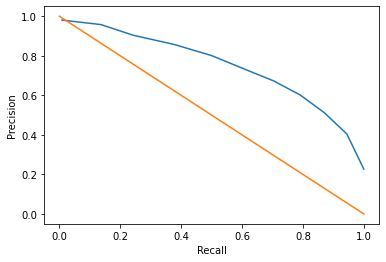

In [58]:
prec = []
rec = []
lis = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in lis:
    predicted = model.predict_proba(X_test)
    predicted[:,1] = (predicted[:,1] >= i).astype(int)
    y_pred2 = predicted[:,1]
    print(i,classification_report(y_test, y_pred2))
    preci = precision_score(y_test, y_pred2)
    prec.append(preci)
    reci = recall_score(y_test, y_pred2)
    rec.append(reci)
    
x_ideal = [0,1]
y_ideal = [1,0]
plt.plot(rec, prec)  
plt.plot(x_ideal,y_ideal)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [111]:
y_pred = model.predict(X_test)
errors = abs(y_pred - y_test)
accuracy_score(y_test,y_pred)

0.8611818354550637

In [112]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[19056  1288]
 [ 2365  3606]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0               precision    recall  f1-score   support

           0       0.00      0.00      0.00     20344
           1       0.23      1.00      0.37      5971

    accuracy                           0.23     26315
   macro avg       0.11      0.50      0.18     26315
weighted avg       0.05      0.23      0.08     26315

0.1               precision    recall  f1-score   support

           0       0.97      0.60      0.75     20344
           1       0.41      0.94      0.57      5971

    accuracy                           0.68     26315
   macro avg       0.69      0.77      0.66     26315
weighted avg       0.85      0.68      0.71     26315

0.2               precision    recall  f1-score   support

           0       0.95      0.77      0.85     20344
           1       0.52      0.87      0.65      5971

    accuracy                           0.79     26315
   macro avg       0.74      0.82      0.75     26315
weighted avg       0.85      0.79      0.80     26315

0.3      

Text(0, 0.5, 'Precision')

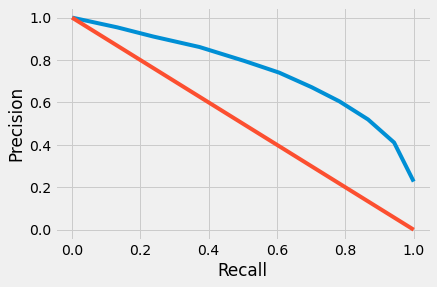

In [194]:
prec = []
rec = []
lis = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in lis:
    predicted = model.predict_proba(X_test)
    predicted[:,1] = (predicted[:,1] >= i).astype(int)
    y_pred2 = predicted[:,1]
    print(i,classification_report(y_test, y_pred2))
    preci = precision_score(y_test, y_pred2)
    prec.append(preci)
    reci = recall_score(y_test, y_pred2)
    rec.append(reci)
    
x_ideal = [0,1]
y_ideal = [1,0]
plt.plot(rec, prec)  
plt.plot(x_ideal,y_ideal)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [133]:
preds

array([0.69330365, 0.17649075, 0.36498948, ..., 0.15344932, 0.15266439,
       0.68054383])

In [157]:
preds

array([0.69330365, 0.17649075, 0.36498948, ..., 0.15344932, 0.15266439,
       0.68054383])

In [152]:
teste = np.array(y_test)
teste

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [147]:
y_test = df[df['Semestre Historico'] == 20181][['Aprovado']]

In [156]:
teste =  np.array(y_test['Aprovado'])
teste

array([1, 1, 1, ..., 0, 0, 0])

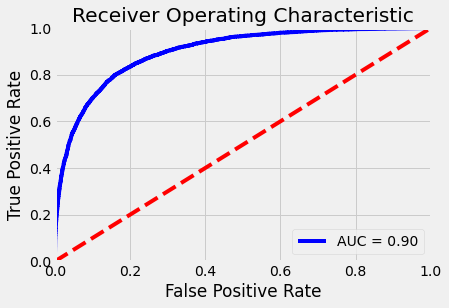

In [159]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
predicted = model.predict_proba(X_test)[:,1]
#predicted[:,1] = (predicted[:,1] >= i).astype(int)
#preds = predicted[:,1]
fpr, tpr, threshold = metrics.roc_curve(teste, predicted)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

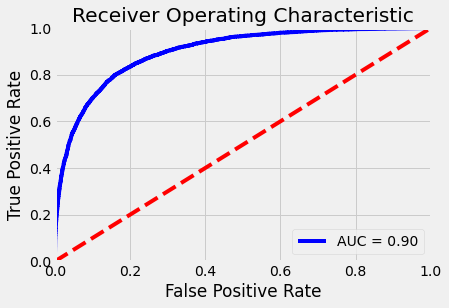

ModuleNotFoundError: No module named 'ggplot'

In [130]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df_plot = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df_plot, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [132]:
y_pred_proba

array([0.69330365, 0.17649075, 0.36498948, ..., 0.15344932, 0.15266439,
       0.68054383])

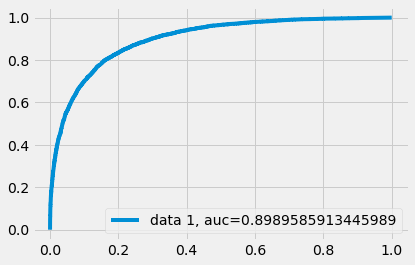

In [131]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

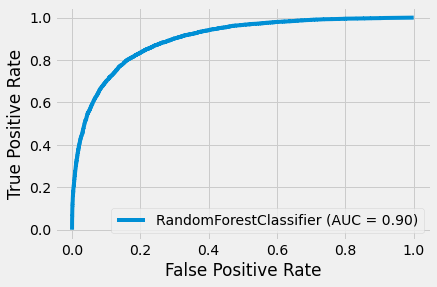

In [127]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(model, X_test, y_test)

In [121]:
predicted = model.predict_proba(X_test)
predicted[:,1] = (predicted[:,1] >= 0.7)
pred = predicted[:,1]

conf_mat = confusion_matrix(y_test,pred)
print(conf_mat)

[[19971   373]
 [ 3724  2247]]


In [122]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91     20344
           1       0.86      0.38      0.52      5971

    accuracy                           0.84     26315
   macro avg       0.85      0.68      0.72     26315
weighted avg       0.85      0.84      0.82     26315



In [119]:
from sklearn.metrics import average_precision_score 
predicted = model.predict_proba(X_test)
y_pred2 = predicted[:,1]
average_precision_score(y_test, y_pred2)


0.7553314683280363

In [120]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[19056  1288]
 [ 2365  3606]]


In [124]:
y_test.value_counts()

0    18866
1     5512
Name: Aprovado, dtype: int64

In [ ]:
prec = []
rec = []
lis = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in lis:
    predicted = model.predict_proba(X_test)
    predicted[:,1] = (predicted[:,1] >= i)
    y_pred2 = predicted[:,1]
    print(i,classification_report(y_test, y_pred2))
    preci = precision_score(y_test, y_pred2)
    prec.append(preci)
    reci = recall_score(y_test, y_pred2)
    rec.append(reci)
    
x_ideal = [0,1]
y_ideal = [1,0]
plt.plot(rec, prec)  
plt.plot(x_ideal,y_ideal)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [84]:
feature_list = list(X_train.columns)

# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: vez                  Importance: 0.24
Variable: IAA Hist Sem         Importance: 0.12
Variable: Aprov Disc           Importance: 0.09
Variable: IAA Sem              Importance: 0.09
Variable: Pontos Vestib        Importance: 0.07
Variable: Aprov Aluno          Importance: 0.06
Variable: Aprov Prof           Importance: 0.06
Variable: Aprov -3             Importance: 0.06
Variable: Carga Horaria        Importance: 0.04
Variable: IAA -1               Importance: 0.04
Variable: Idade Vest           Importance: 0.03
Variable: Aprov -1             Importance: 0.03
Variable: Horas Aula           Importance: 0.02
Variable: Cont Disc            Importance: 0.02
Variable: FI                   Importance: 0.02
Variable: Sexo                 Importance: 0.01
Variable: Categoria de Ingresso Importance: 0.01
Variable: Etnia_branca         Importance: 0.01
Variable: Pontos SISU          Importance: 0.0
Variable: TipoCurriculo        Importance: 0.0
Variable: Etnia_indígena       Importance

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

(0.0, 0.5)

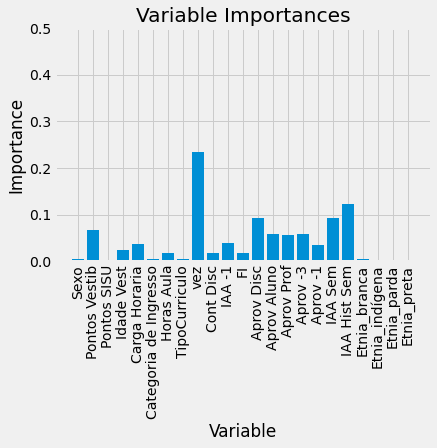

In [85]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.ylim(0,0.5)

In [127]:
model.score(X_train,y_train)

0.9971927448677663

In [128]:
model.score(X_test,y_test)

0.8581097711050948

In [131]:
y_pred_proba = model.predict_proba(X_test)[::,1]
roc_auc_score(y_test,y_pred_proba)

0.8917169887867024

In [133]:
y_pred_proba

array([0.05, 0.35, 0.25, ..., 0.35, 0.22, 0.29])

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     18866
           1       0.73      0.60      0.66      5512

    accuracy                           0.86     24378
   macro avg       0.81      0.77      0.78     24378
weighted avg       0.85      0.86      0.85     24378



In [136]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [36]:
feature_list = list(X_train.columns)

# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: vez                  Importance: 0.22
Variable: IAA Hist Sem         Importance: 0.13
Variable: Aprov Disc           Importance: 0.1
Variable: IAA Sem              Importance: 0.1
Variable: Aprov -3             Importance: 0.08
Variable: Pontos Vest          Importance: 0.07
Variable: Aprov Aluno          Importance: 0.07
Variable: Aprov Prof           Importance: 0.07
Variable: Aprov -1             Importance: 0.06
Variable: Cont Disc            Importance: 0.03
Variable: Idade Vest           Importance: 0.02
Variable: Horas Aula           Importance: 0.02
Variable: Sexo                 Importance: 0.01
Variable: Etnia                Importance: 0.01
Variable: Categoria de Ingresso Importance: 0.01
Variable: TipoCurriculo        Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

(0.0, 0.5)

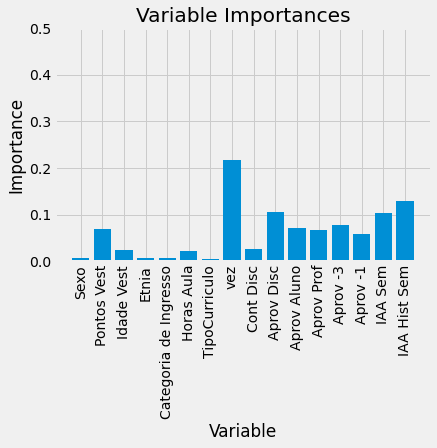

In [37]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.ylim(0,0.5)

## Logistic Regression

In [86]:
logisticRegr = LogisticRegression(max_iter=10000)

In [87]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [88]:
y_pred = logisticRegr.predict(X_test)

In [89]:
errors = abs(y_pred - y_test)
accuracy_score(y_test,y_pred)

0.8512635379061372

In [90]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[19170  1174]
 [ 2740  3231]]


In [91]:
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]

In [92]:
roc_auc_score(y_test,y_pred_proba)

0.8854282871208745

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     20344
           1       0.73      0.54      0.62      5971

    accuracy                           0.85     26315
   macro avg       0.80      0.74      0.77     26315
weighted avg       0.84      0.85      0.84     26315



Feature: 0, Score: -0.12619
Feature: 1, Score: -0.38885
Feature: 2, Score: -0.04110
Feature: 3, Score: 3.38531
Feature: 4, Score: -1.46266
Feature: 5, Score: 0.22348
Feature: 6, Score: -0.15498
Feature: 7, Score: -0.00190
Feature: 8, Score: 1.03365
Feature: 9, Score: -0.61799
Feature: 10, Score: 0.04934
Feature: 11, Score: 0.09319
Feature: 12, Score: -3.83135
Feature: 13, Score: 1.17423
Feature: 14, Score: -1.44849
Feature: 15, Score: -0.84134
Feature: 16, Score: 2.09598
Feature: 17, Score: -4.66838
Feature: 18, Score: -3.68784
Feature: 19, Score: -0.11442
Feature: 20, Score: 0.04119
Feature: 21, Score: 0.08299
Feature: 22, Score: 0.18593


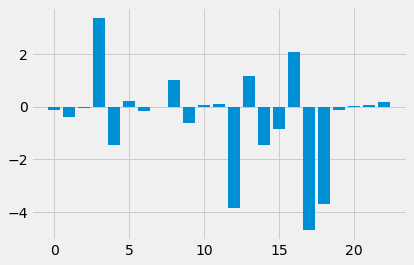

In [94]:
from matplotlib import pyplot
# get importance
importance = logisticRegr.coef_[0]
logisticRegr.get_params
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [67]:
predicted = model.predict_proba(X_test)
#predicted[:,0] = (predicted[:,0] < threshold).astype('int')
#predicted[:,1] = (predicted[:,1] >= 0.6)
#y_pred2 = predicted[:,1]

In [208]:
df2 = df.copy()
df2 = df2[['Nota']]
# Create x, where x the 'scores' column's values as floats
x = df2[['Nota']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df2['Nota'] = df_normalized

In [209]:
predicted = model.predict_proba(X_test)

y_test2 = df[df['Semestre Historico'] == 20181]['Nota']
y_test2 = y_test2.to_frame()['Nota'].to_numpy()

true_relevance = np.asarray([y_test2])

y_pred_probability = np.asarray([predicted[:,1]])

In [201]:
true_relevance

array([[ 0.,  0.,  0., ..., 10., 10., 10.]])

In [202]:
from sklearn.metrics import ndcg_score

In [211]:
predicted = model.predict_proba(X_test)
y_pred_probability = np.asarray([predicted[:,1]])
ndcg = ndcg_score(true_relevance, y_pred_probability,k=100)
ndcg

0.1565296322777981

In [212]:

ndcg_score(true_relevance, y_pred_probability,k=24378)


0.8355971923136369

In [145]:
true_relevance

array([[ 0.,  0.,  0., ..., 10., 10., 10.]])

In [147]:
df = pd.DataFrame(data=y_pred_probability)
df.value_counts()

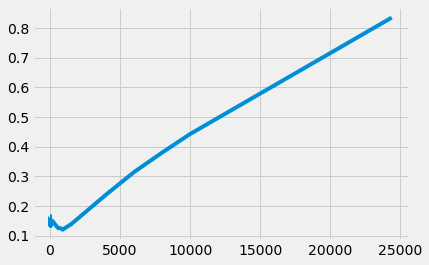

In [207]:
#predicted = model.predict_proba(X_test)[:,1]
k_num = [1,2,3,4,5,10,50,150,200,250,400,500,600,700,800,900,1000,1500,4000,6000,8000,10000,24378]
ndcg_scores = []

for i in k_num:
    ndcg = ndcg_score(true_relevance, y_pred_probability,k=i)
    ndcg_scores.append(ndcg)
    
    
plt.plot(k_num, ndcg_scores)  
#plt.plot(x_ideal,y_ideal)


In [199]:
from sklearn.metrics import dcg_score
# we have groud-truth relevance of some answers to a query:
true_relevance = np.asarray([[10, 0, 0, 1, 5]])
# we predict scores for the answers
scores = np.asarray([[.1, .2, .3, 4, 70]])
dcg_score(y_test, y_pred)

# we can set k to truncate the sum; only top k answers contribute
dcg_score(true_relevance, scores, k=2)

# now we have some ties in our prediction
scores = np.asarray([[1, 0, 0, 0, 1]])
# by default ties are averaged, so here we get the average true
# relevance of our top predictions: (10 + 5) / 2 = 7.5
dcg_score(true_relevance, scores, k=1)

# we can choose to ignore ties for faster results, but only
# if we know there aren't ties in our scores, otherwise we get
# wrong results:
dcg_score(true_relevance,
          scores, k=1, ignore_ties=True)


ValueError: Only ('multilabel-indicator', 'continuous-multioutput', 'multiclass-multioutput') formats are supported. Got binary instead